
📌 First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  

📌 Dataset Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%        

<Figure size 1000x600 with 0 Axes>

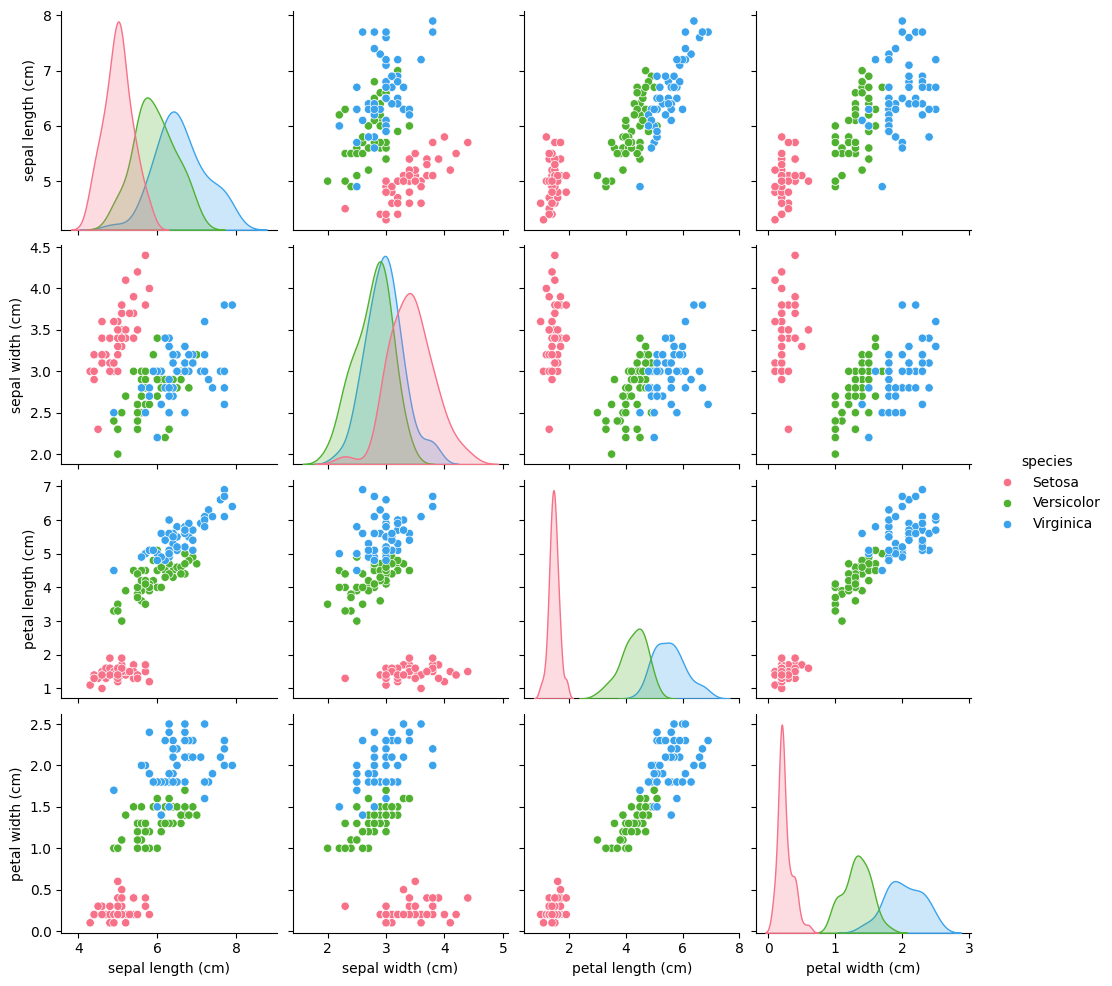


✅ Model Accuracy: 93.33%

📌 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



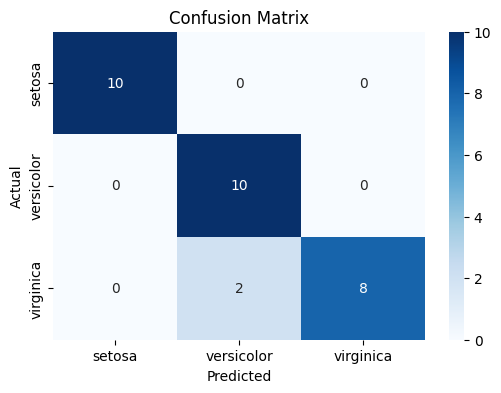

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris() #loading required dataset for the output and plotting

# Convert dataset into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Mapping species labels to actual names
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Display the first few rows of the dataset
print("\n📌 First 5 rows of the dataset:")
print(df.head())

# Summary of dataset
print("\n📌 Dataset Summary:")
print(df.describe())

# Visualizing the dataset
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue="species", palette="husl")
plt.show()

# Splitting data into features (X) and target labels (y)
X = iris.data  # Features (sepal & petal dimensions)
y = iris.target  # Target variable (species)

# Splitting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the data (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2%}")  # Display as percentage

# Display classification report
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
